# 1. Let's Create Our Credit Card Dataset

## Now let's get generate an Augumentated Dataset from these two samples 


In [14]:
#Create our dataset directories

import os

def makedir(directory):
    """Creates a new directory if it does not exist"""
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None, 0
    
for i in range(0,10):
    directory_name = "./credit_card/train/"+str(i)
    print(directory_name)
    makedir(directory_name) 

for i in range(0,10):
    directory_name = "./credit_card/test/"+str(i)
    print(directory_name)
    makedir(directory_name)

./credit_card/train/0
./credit_card/train/1
./credit_card/train/2
./credit_card/train/3
./credit_card/train/4
./credit_card/train/5
./credit_card/train/6
./credit_card/train/7
./credit_card/train/8
./credit_card/train/9
./credit_card/test/0
./credit_card/test/1
./credit_card/test/2
./credit_card/test/3
./credit_card/test/4
./credit_card/test/5
./credit_card/test/6
./credit_card/test/7
./credit_card/test/8
./credit_card/test/9


## Let's make our Data Augmentation Functions
These are used to perform image manipulation and pre-processing tasks

In [1]:
import cv2
import numpy as np 
import random
import cv2
from scipy.ndimage import convolve

def DigitAugmentation(frame, dim = 32):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
    if(random_num % 3 == 0):
        frame = pixelate(frame)
    if(random_num % 2 == 0):
        frame = stretch(frame)
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)

    return frame 

def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0,2) == 0:
        frame = cv2.resize(image, (32, ran+32), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+32)-int(ran/2), 0:32]
    else:
        frame = cv2.resize(image, (ran+32, 32), interpolation = cv2.INTER_AREA)
        return frame[0:32, int(ran/2):int(ran+32)-int(ran/2)]
    
def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

# Resizing images to the desired sizes

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
width = 200
height = 200
dim = (width, height)

path="C:/IUBH/Books/Master_Thesis/ThesisProject/temp/"
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    #print(os.path.basename(path).split('/')[-1])
    image_name=img.split(".")[0]
    rgb_image = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    
    # resize image
    resized = cv2.resize(rgb_image, dim, interpolation = cv2.INTER_AREA)
    image = tf.expand_dims(resized, 0)
    #plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.imsave(image_name +".jpg",resized)
   

# Testing our augmentation functions

In [61]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# This is the coordinates of the region enclosing  the first digit
# This is preset and was done manually based on this specific image
region = [(0, 0), (35, 48)]

# Assigns values to each region for ease of interpretation
top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,1): #We only look at the first digit in testing out augmentation functions
    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    cv2.imshow("roi",roi)
    for j in range(0,10):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imshow("otsu", roi_otsu)
        cv2.waitKey(0)
        
cv2.destroyAllWindows()

## Creating our Training Data (2000 variations of each font type)

In [26]:
# Creating 2000 Images for each digit in creditcard_digits1 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits1", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [27]:
# Creating 2000 Images for each digit in creditcard_digits2 - TRAINING DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)
        #cv2.imshow("otsu", roi_otsu)
        #print("-")
        #cv2.waitKey(0)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [84]:
# Creating 2000 Images for each digit in creditcard_digits3 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits3.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits3", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(8, 2), (62, 82)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if 0<i<5:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58
    elif i==5:
        top_left_x = top_left_x + 66
        bottom_right_x = bottom_right_x + 66
    elif i>5:    
        top_left_x = top_left_x + 55
        bottom_right_x = bottom_right_x + 55

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_3_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [88]:
# Creating 2000 Images for each digit in creditcard_digits4 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits4.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits4", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(12, 2), (66, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 57
        bottom_right_x = bottom_right_x + 57


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_4_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [94]:
# Creating 2000 Images for each digit in creditcard_digits5 - TRAINING DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits5.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits5", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(4, 2), (64, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_5_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [3]:
# Creating 200 Images for each digit in creditcard_digits1 - TEST DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits1", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [4]:
# Creating 200 Images for each digit in creditcard_digits2 - TEST DATA

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)
        #cv2.imshow("otsu", roi_otsu)
        #print("-")
        #cv2.waitKey(0)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [6]:
# Creating 2000 Images for each digit in creditcard_digits3 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits3.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits3", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(8, 2), (62, 82)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if 0<i<5:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58
    elif i==5:
        top_left_x = top_left_x + 66
        bottom_right_x = bottom_right_x + 66
    elif i>5:    
        top_left_x = top_left_x + 55
        bottom_right_x = bottom_right_x + 55

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_3_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [7]:
# Creating 2000 Images for each digit in creditcard_digits4 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits4.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits4", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(12, 2), (66, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 57
        bottom_right_x = bottom_right_x + 57


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_4_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [8]:
# Creating 2000 Images for each digit in creditcard_digits5 - Test DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits5.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2.imshow("cc1", th2)
cv2.imshow("creditcard_digits5", cc1)
cv2.waitKey(0)
cv2.destroyAllWindows()

region = [(4, 2), (64, 88)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 58
        bottom_right_x = bottom_right_x + 58


    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_5_"+str(j)+".jpg", roi_otsu)
cv2.destroyAllWindows()

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


# 2. Creating our Classifier

In [9]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import keras

input_shape = (32, 32, 3)
img_width = 32
img_height = 32
num_classes = 10
nb_train_samples = 10000
nb_validation_samples = 10000
batch_size = 16
epochs = 1

train_data_dir = './credit_card/train'
validation_data_dir = './credit_card/test'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 10,           # randomly applies rotations
      width_shift_range = 0.25,       # randomly applies width shifting
      height_shift_range = 0.25,      # randomly applies height shifting
      shear_range=0.5,
      zoom_range=0.5,
      horizontal_flip = False,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False)    

Found 100000 images belonging to 10 classes.
Found 100000 images belonging to 10 classes.


## Creating out Model based on the LeNet CNN Architecture

In [10]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 20)        1520      
                                                                 
 activation (Activation)     (None, 32, 32, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                    

## Training our Model

In [12]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("/home/deeplearningcv/DeepLearningCV/Trained Models/creditcard.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 100000
nb_validation_samples = 100000
epochs = 5
batch_size = 64

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save("/home/deeplearningcv/DeepLearningCV/Trained Models/creditcard.h5")

Epoch 1/5


C:\Users\Hamid\AppData\Local\Temp\ipykernel_11204\1411676409.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1562/1562 [==============================] - ETA: 0s - loss: 0.1739 - accuracy: 0.9453
Epoch 1: val_loss improved from inf to 0.06176, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\creditcard.h5
1562/1562 [==============================] - 295s 189ms/step - loss: 0.1739 - accuracy: 0.9453 - val_loss: 0.0618 - val_accuracy: 0.9870
Epoch 2/5
1562/1562 [==============================] - ETA: 0s - loss: 0.1637 - accuracy: 0.9481
Epoch 2: val_loss improved from 0.06176 to 0.00154, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\creditcard.h5
1562/1562 [==============================] - 190s 122ms/step - loss: 0.1637 - accuracy: 0.9481 - val_loss: 0.0015 - val_accuracy: 0.9990
Epoch 3/5
1562/1562 [==============================] - ETA: 0s - loss: 0.1470 - accuracy: 0.9537
Epoch 3: val_loss did not improve from 0.00154
1562/1562 [==============================] - 176s 113ms/step - loss: 0.1470 - accuracy: 0.9537 - val_loss: 0.0779 - val_accuracy: 0.9879

# 3. Extract a Credit Card from the backgroud
#### NOTE:
You may need to install imutils 
run *pip install imutils* in terminal and restart your kernal to install

In [18]:
from roboflow import Roboflow
rf = Roboflow(api_key="bLeDIGed220IyKA1cJKs")
project = rf.workspace().project("creditcard_number_detection")
model = project.version(4).model

# infer on a local image
print(model.predict("rojin.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 298.0, 'y': 491.0, 'width': 424.0, 'height': 102.0, 'confidence': 0.8632880449295044, 'class': 'Digits', 'image_path': 'rojin.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': 600, 'height': 600}}


In [2]:
import cv2
import numpy as np
import imutils
from skimage.filters import threshold_local
import os

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

def doc_Scan(image):
    orig_height, orig_width = image.shape[:2]
    ratio = image.shape[0] / 500.0

    orig = image.copy()
    image = imutils.resize(image, height = 500)
    orig_height, orig_width = image.shape[:2]
    Original_Area = orig_height * orig_width
    
    # convert the image to grayscale, blur it, and find edges
    # in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, 75, 200)

    cv2.imshow("Image", image)
    cv2.imshow("Edged", edged)
    cv2.waitKey(0)
    # show the original image and the edge detected image

    # find the contours in the edged image, keeping only the
    # largest ones, and initialize the screen contour
    contours, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
    
    # loop over the contours
    for c in contours:

        # approximate the contour
        area = cv2.contourArea(c)
        if area < (Original_Area/3):
            print("Error Image Invalid")
            return("ERROR")
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if our approximated contour has four points, then we
        # can assume that we have found our screen
        if len(approx) == 4:
            screenCnt = approx
            break

    # show the contour (outline) of the piece of paper
    cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
    cv2.imshow("Outline", image)

    warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
    # convert the warped image to grayscale, then threshold it
    # to give it that 'black and white' paper effect
    cv2.resize(warped, (640,403), interpolation = cv2.INTER_AREA)
    cv2.imwrite("credit_card_color.jpg", warped)
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    warped = warped.astype("uint8") * 255
    cv2.imshow("Extracted Credit Card", warped)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return warped

In [4]:
cv2.destroyAllWindows()

## Extract our Credit Card and the Region of Interest (ROI)

In [19]:
image = cv2.imread('untitled.jpg')
image=image[88:116,19:189]

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (5, 5), 0)
#edged = cv2.Canny(gray, 75, 200)
cv2.imwrite("credit_card_extracted_digits.jpg",image)
#cv2.imshow("Image", image)
cv2.imshow("Gray", image)
cv2.waitKey(0)
'''image = doc_Scan(image)

region=[(19,88),(187,116)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

# Extracting the area were the credit numbers are located
roi = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
#roi = image(88:116, 19:187)
cv2.imshow("Region", roi)
#cv2.imwrite("credit_card_extracted_digits.jpg", roi)
cv2.imwrite("untitled_extracted_digits.jpg", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

'image = doc_Scan(image)\n\nregion=[(19,88),(187,116)]\n\ntop_left_y = region[0][1]\nbottom_right_y = region[1][1]\ntop_left_x = region[0][0]\nbottom_right_x = region[1][0]\n\n# Extracting the area were the credit numbers are located\nroi = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]\n#roi = image(88:116, 19:187)\ncv2.imshow("Region", roi)\n#cv2.imwrite("credit_card_extracted_digits.jpg", roi)\ncv2.imwrite("untitled_extracted_digits.jpg", roi)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

## Loading our trained model

In [3]:
from keras.models import load_model
import keras

classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/creditcard.h5')

# Let's test on our extracted image

In [5]:
import tensorflow as tf
import cv2
def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 100:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
#img=binary_mask[1]
img = cv2.imread('erosion_photocopy.jpeg')
orig_img = cv2.imread('untitled.jpg')
gray=img
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", img)
cv2.waitKey(0)

# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow("blurred", blurred)
cv2.waitKey(0)

#edged = cv2.Canny(blurred, 240, 250)
#cv2.imshow("edged", edged)
#cv2.waitKey(0)

# Find Contours
ret, thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] #Change this to 16 to get all digits
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

# loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c) 
    #print(x, y, w, h)
    if w >= 1 and h >= 16 and cv2.contourArea(c) < 8000:
        roi = blurred[y:y + h, x:x + w]
        #ret, roi = cv2.threshold(roi, 20, 255,cv2.THRESH_BINARY_INV)
        #cv2.imshow("ROI1", roi)
        roi_otsu = pre_process(roi, True)
        #cv2.imshow("ROI2", roi_otsu)
        roi_otsu = cv2.cvtColor(roi_otsu, cv2.COLOR_GRAY2RGB)
        roi_otsu = tf.keras.preprocessing.image.img_to_array(roi_otsu)
        roi_otsu = roi_otsu * 1./255
        roi_otsu = np.expand_dims(roi_otsu, axis=0)
        image = np.vstack([roi_otsu])
        #label = str(classifier.predict_classes(image, batch_size = 10))[1]
        predict_x=classifier.predict(image, batch_size = 10)[0]
        #predict_x=model.predict(image, batch_size = 10)[0]
        classes_x=np.argmax(predict_x,axis=0)
        label=str(classes_x)
        #print(label)
        full_number.append(label)
        (x, y, w, h) = (x+(3*19), y+(3*88), w, h)
        # resize image
        #rgb_image = cv2.cvtColor("untitled.jpg", cv2.COLOR_BGR2RGB)
        #resized = cv2.resize(rgb_image, (600,600), interpolation = cv2.INTER_AREA)
        cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(orig_img, label, (x , y), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", orig_img)
        cv2.waitKey(0) 
        #HERSHEY_COMPLEX
cv2.destroyAllWindows()

card_number=""
for i in range(16):
    card_number=card_number+str(full_number[i])
    
print(card_number)

1/1 [==============================] - 0s 268ms/step
6104337870668645


In [131]:
# Let's load a simple image with 3 black squares
#image = cv2.imread('creditcard_extracted_digits.jpg')
#cv2.waitKey(0)
image = cv2.imread('opened.jpeg')
#image=image[147:181,30:170]

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur image then find edges using Canny 
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow("blurred", blurred)
cv2.waitKey(0)

edged = cv2.Canny(blurred, 240, 250)
cv2.imshow("edged", edged)
cv2.waitKey(0)

# Find Canny edges
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
#edged=cv2.Canny(thresh,30,150)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:16] #Change this to 16 to get all digits
print("Number of Contours found = " + str(len(contours)))
#contours = sorted(contours, key = x_cord_contour, reverse = False)
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
sum_width=0
sum_area=0
for cnt in contours:
    x,y,w,h=cv2.boundingRect(cnt)
    sum_width=sum_width+ w
    sum_area=sum_area+cv2.contourArea(cnt)
    #print(cv2.contourArea(cnt))
    print('cordinates contour:',x,y,w,h,"  cv2.contour area is:",cv2.contourArea(cnt))
    
print("average width is:", sum_width/len(contours))
print("average area is:", sum_area/len(contours))
'''outputImage=image
    

SyntaxError: incomplete input (3527549907.py, line 41)

In [10]:
import tensorflow 
import keras  
import os
import cv2
import glob
import skimage
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
image = cv2.imread('credit_card_extracted_digits.jpg')
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

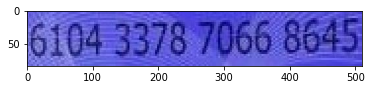

In [20]:
norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))
plt.imshow(norm_image)

In [49]:
import numpy as np
print(erosion.shape)
erosion = np.expand_dims(erosion, axis=2)
print(erosion.shape)
gray_image = skimage.color.rgb2gray(erosion)
plt.imshow(gray_image, cmap = 'gray')

(84, 510)
(84, 510, 1)


ValueError: the input array must have size 3 along `channel_axis`, got (84, 510, 1)

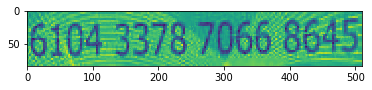

In [215]:
img = cv2.imread('credit_card_extracted_digits.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((120,120),np.uint8)
# Top Hat Transform
topHat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# Black Hat Transform

blackHat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

res = gray_image + topHat - blackHat

plt.imshow(res, interpolation='nearest')
plt.show()

In [14]:
import matplotlib.image

#matplotlib.image.imsave('test2.jpeg', res)

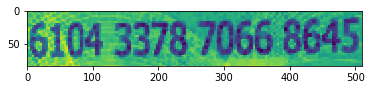

In [46]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('ColorSpaceReduced-credit_card_extracted_digits.jpg', cv2.IMREAD_GRAYSCALE)
#img=binary_mask
kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, interpolation='nearest')
plt.show()

In [24]:
matplotlib.image.imsave('erosion_extracted1.jpeg', erosion)

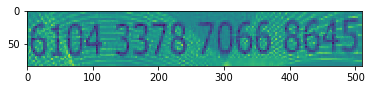

In [186]:
img = cv2.imread('tophat.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, interpolation='nearest')
plt.show()



In [187]:
matplotlib.image.imsave('delite_tophat.jpeg', dilation)

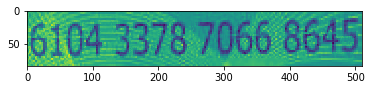

In [180]:
img = cv2.imread('tophat.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(dilation, interpolation='nearest')
plt.show()


In [181]:
matplotlib.image.imsave('opened_tophat.jpeg', opening)

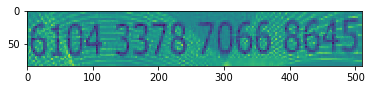

In [193]:
img = cv2.imread('tophat.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((1,1),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(dilation, interpolation='nearest')
plt.show()


In [194]:
matplotlib.image.imsave('closed_tophat.jpeg', closing)

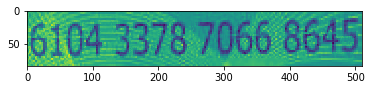

In [105]:
img = cv2.imread('credit_card_extracted_digits.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((7,7),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(dilation, interpolation='nearest')
plt.show()



In [106]:
matplotlib.image.imsave('gradient.jpeg', gradient)

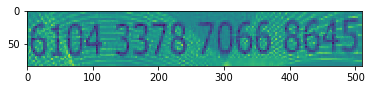

In [199]:
img = cv2.imread('blackhat.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((120,120),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(dilation, interpolation='nearest')
plt.show()



In [200]:
matplotlib.image.imsave('tophat_blackhat.jpeg', tophat)

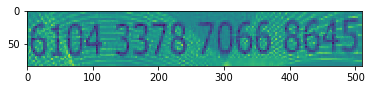

In [203]:
img = cv2.imread('tophat.jpeg', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((1000,1000),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(dilation, interpolation='nearest')
plt.show()


In [204]:
matplotlib.image.imsave('blackhat_tophat.jpeg', blackhat)

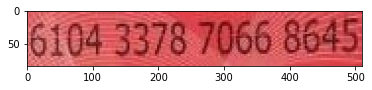

In [37]:
"""
* Python script to ignore low intensity pixels in an image.
*
"""
import imageio.v3 as iio

# read input image
image = iio.imread(uri="credit_card_extracted_digits.jpg")

# display original image
fig, ax = plt.subplots()
plt.imshow(image)

In [38]:
# keep only high-intensity pixels
image[image < 128] = 0

# display modified image
fig, ax = plt.subplots()
plt.imshow(image)

ValueError: assignment destination is read-only

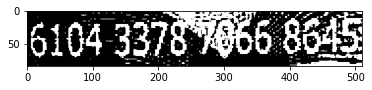

In [58]:
import imageio.v3 as iio
import numpy as np
import skimage.color
import skimage.util
import matplotlib.pyplot as plt
#%matplotlib widget

# read input image
image = iio.imread(uri="binary_mask.png", mode="L")

# convert the image to float dtype with a value range from 0 to 1
image = skimage.util.img_as_float(image)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")


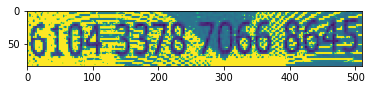

In [36]:
image[image > 0.5] = 1

# display modified image
fig, ax = plt.subplots()
plt.imshow(image)

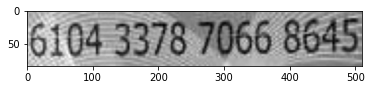

In [78]:
# read input image
image = iio.imread(uri="credit_card_extracted_digits.jpg")

# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
#plt.imshow(gray_image, cmap="gray")
plt.imshow(blurred_image, cmap="gray")

In [3]:
import cv2
imgPath="credit_card_extracted_digits.jpg"
colorSpaceReduction=4
color_reduced_img =cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE) // colorSpaceReduction * colorSpaceReduction + colorSpaceReduction // 2
#cv2.imshow("color reduced",color_reduced_img)
file_name = 'ColorSpaceReduced-'+imgPath.split('.')[0]+'.jpg'
cv2.imwrite(file_name, color_reduced_img)

True

(0.0, 1.0)

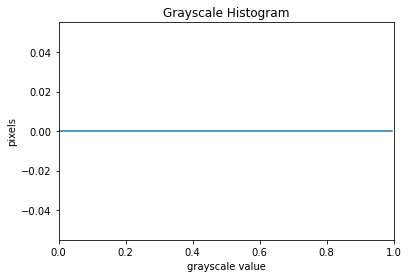

In [26]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(color_reduced_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

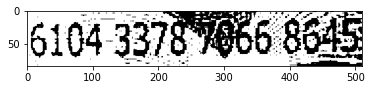

In [68]:
# create a mask based on the threshold
t = 0.6
binary_mask = image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [17]:
#matplotlib.image.imsave('binary_mask.jpeg', binary_mask)
plt.imsave('binary_mask.jpeg', binary_mask)

In [19]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(binary_mask)
print("Found automatic threshold t = {}.".format(t))


Found automatic threshold t = 0.001953125.


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


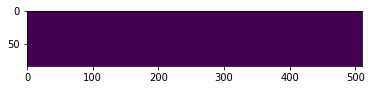

In [57]:
# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0.001

fig, ax = plt.subplots()
plt.imshow(selection)

In [129]:
plt.imsave('binary_mask.jpeg', selection)

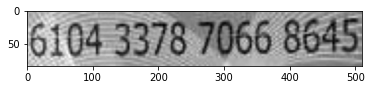

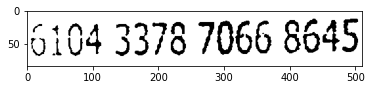

In [134]:
image = iio.imread(uri="credit_card_extracted_digits.jpg")

# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")
t = 0.3
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

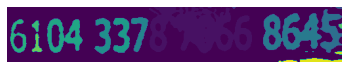

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure

def connected_components(filename, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

labeled_image, count = connected_components(filename="credit_card_extracted_digits.jpg", sigma=2.0, t=0.4, connectivity=2)

fig, ax = plt.subplots()
plt.imshow(labeled_image)
plt.axis("off");

# xerox photocopy filter

In [9]:
def xeroxFilter(imgPath, colorSpaceReduction=8, rotate=False, fillColor=(255,255,255)):
  '''Takes image as input and returns a xerox like image of the input image.
  impPath: Name of Image(keep the images in the same folder as this script)
  colorSpaceReduction:  Reducing the color space. Higher the value, Higher the reduction. 
  rotate: Rotate to the image
  fillColor: Specify the RGB value of the background color after roatation
  '''
  print("Original Image")
  cv2.imshow("original iamge",cv2.imread(imgPath))

  print('GreyScale')
  cv2.imshow("GrayScale",cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE))
  
  print('Color Space Reduced')
  color_reduced_img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE) // colorSpaceReduction * colorSpaceReduction + colorSpaceReduction // 2
  cv2.imshow("Color Space Reduced",color_reduced_img)
  file_name = 'ColorSpaceReduced-'+imgPath.split('.')[0]+'.png'
  cv2.imwrite(file_name, color_reduced_img)
'''  
  if rotate:
    print("Rotated")
    img = Image.open(file_name)
    rgb_img = Image.new("RGBA", img.size)
    rgb_img.paste(img)
    rotated_img = rgb_img.rotate(random.randint(-25,25), expand = 1, fillcolor = fillColor)
    display(rotated_img)
    rotated_img.save('Rotated-'+file_name)    '''
  #print("Original Image")
  #cv2_imshow(cv2.imread(imgPath))

xeroxFilter('credit_card_extracted_digits.jpg', rotate=True)

Original Image
GreyScale
Color Space Reduced


# sharpen an image

Found automatic threshold t = 0.33372727840471883.


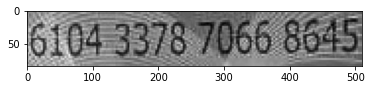

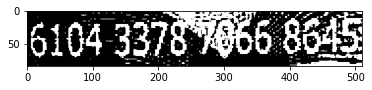

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure
# load the image into system memory
image = cv2.imread('credit_card_extracted_digits.jpg', flags=cv2.IMREAD_COLOR)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2.imshow('AV CV- Winter Wonder Sharpened', image_sharp)
cv2.waitKey()
cv2.destroyAllWindows()

# convert to grayscale image
gray_image = skimage.color.rgb2gray(image_sharp)
cv2.imshow('Image Gray-Scaled after it has been Sharpened', gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)
cv2.imshow('Image gut blurred after Sharpening and gray scaling', blurred_image)
cv2.waitKey()
cv2.destroyAllWindows()

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray")

# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [16]:
gray = cv2.cvtColor(binary_mask, cv2.COLOR_BGR2RGB)
cv2.imshow("binary mask",gray)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


# removing background

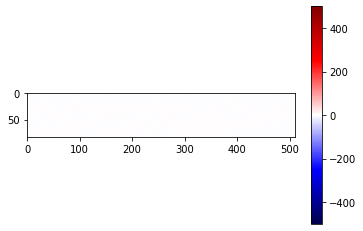

In [89]:
import scipy.ndimage as ndi
weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]
#im=cv2.imread('credit_card_extracted_digits.jpg')
im=blurred_image
# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-500, vmax=500);
plt.colorbar();
#format_and_render_plot();